# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

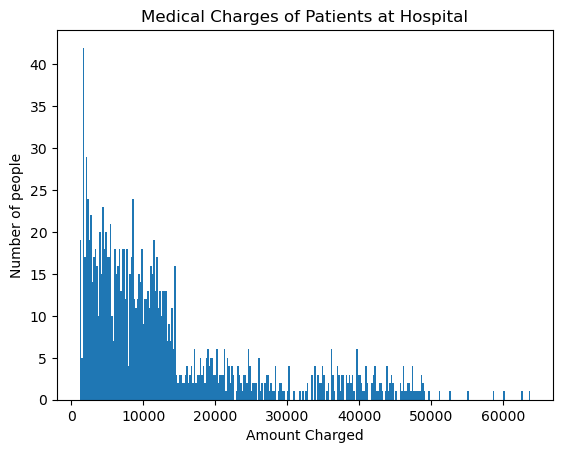

In [14]:
_ = plt.hist(medical['charges'], bins=300)
_ = plt.xlabel('Amount Charged')
_ = plt.ylabel('Number of people')
_ = plt.title('Medical Charges of Patients at Hospital')

In [16]:
mean = np.mean(medical['charges'])
mean

13270.422265141257

In [18]:
#the standard deviation is almost as large as the mean, this shows the insanely vast array of charges at the hospital
std = np.std(medical['charges'], ddof=1)
std

12110.011236693994

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ A t-test would be the most appropriate test to check if the actual average charge is below 12,000. The null hypothesis would be that the population mean is >= 12,000 and the alternative hypothesis is that the population mean is < 12,000. The data would allow me to use the sample mean and std to calculate the t-statistic. Then I would compare that to the critical value from the t-distro table and give a better estimation about the actual average charge.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A two-sided interval would be most appropriate.

In [22]:
n = len(medical['charges'])
std_error = std / np.sqrt(n)

In [24]:
t_critical = t.ppf(0.975, df=n-1)

In [25]:
lower = mean - t_critical * std_error
upper = mean + t_critical * std_error

In [26]:
print("Sample mean:", mean)
print("Standard error of the mean:", std_error)
print("Critical value:", t_critical)
print("95% Confidence interval:", (lower, upper))

Sample mean: 13270.422265141257
Standard error of the mean: 331.06745431568226
Critical value: 1.961739888600845
95% Confidence interval: (12620.954034192644, 13919.890496089869)


In [27]:
# There should not be a concern as we are 95% confident that a majority of the charges fall between $12,620 and $13,919 with an average of $13,270.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis would be that there is no difference in the amount charged to people with insurance and those without insurance. The alternative hypothesis is that there is a difference in the amount charge to the people with insurance and those without insurance. The assumption of the variances are that they are roughly the same.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [33]:
insured = medical[medical['insuranceclaim'] == 1]['charges']
insured.head()

0     16884.9240
1      1725.5523
4      3866.8552
6      8240.5896
10     2721.3208
Name: charges, dtype: float64

In [34]:
uninsured = medical[medical['insuranceclaim'] == 0]['charges']
uninsured.head()

2     4449.46200
3    21984.47061
5     3756.62160
7     7281.50560
8     6406.41070
Name: charges, dtype: float64

In [35]:
insured_mean = np.mean(insured)
insured_mean

16423.928276537677

In [36]:
uninsured_mean = np.mean(uninsured)
uninsured_mean

8821.421892306305

In [37]:
i_std = np.std(insured, ddof=1)
u_std = np.std(uninsured, ddof=1)

In [38]:
i_n = len(insured)
u_n = len(uninsured)

In [39]:
# combined sample standard deviation
std_combined = np.sqrt(((i_n - 1) * (i_std ** 2) + (u_n - 1) * (u_std ** 2)) / (i_n + u_n - 2))

In [40]:
# standard error of the mean difference
sem = std_combined * np.sqrt(1/i_n + 1/u_n)

In [41]:
# t-statistic
t_stat = (insured_mean - uninsured_mean) / sem

In [42]:
# degrees of freedom
df = (i_std ** 2 / i_n + u_n ** 2 / u_n) ** 2 / ((i_std ** 2 / i_n) ** 2 / (i_n - 1) + (u_std ** 2 / u_n) ** 2 / (u_n - 1))

In [43]:
# p-value
p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=df))

In [44]:
print("Insured mean:", insured_mean)
print("Insured standard deviation:", i_std)
print("Uninsured mean:", uninsured_mean)
print("Uninsured standard deviation:", u_std)
print("Standard error of the mean difference:", sem)
print("T-statistic:", t_stat)
print("Degrees of freedom:", df)
print("P-value:", p_value)

Insured mean: 16423.928276537677
Insured standard deviation: 14045.928418802127
Uninsured mean: 8821.421892306305
Uninsured standard deviation: 6446.510126811736
Standard error of the mean difference: 639.2260351391293
T-statistic: 11.893299030876715
Degrees of freedom: 698.3870178769765
P-value: 0.0


In [46]:
from scipy.stats import ttest_ind

t_stat2, p_value2 = ttest_ind(insured, uninsured)

In [50]:
print("Function T-statistic:", t_stat2)
print("Function P-value:", int(p_value2))

Function T-statistic: 11.893299030876712
Function P-value: 0


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I do not see an equivalent for performing a z-test within scipy.stats. However, I do see that from statsmodels.stats.proportion, there is a proportions_ztest function that can be used to perform z-tests

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test